In [1]:
import numpy as np                                                 # Implemennts milti-dimensional array and matrices
import pandas as pd                                                # For data manipulation and analysis
import pandas_profiling
import matplotlib.pyplot as plt                                    # Plotting library for Python programming language and it's numerical mathematics extension NumPy
import seaborn as sns                                              # Provides a high level interface for drawing attractive and informative statistical graphics
%matplotlib inline


In [2]:
titanic_data = pd.read_csv("data/titanic_train.csv")     # Importing training dataset using pd.read_csv

In [3]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
titanic_data.Embarked = titanic_data.Embarked.fillna(titanic_data['Embarked'].mode()[0])
median_age = titanic_data.Age.median()
median_fare = titanic_data.Fare.median()
titanic_data.Age.fillna(median_age, inplace = True)
titanic_data.Fare.fillna(median_fare, inplace = True)
titanic_data.drop('Cabin', axis = 1,inplace = True)


In [6]:
titanic_data['FamilySize'] = titanic_data['SibSp'] + titanic_data['Parch']+1
titanic_data['GenderClass'] = titanic_data.apply(lambda x: 'child' if x['Age'] < 15 else x['Sex'],axis=1)
titanic_data[titanic_data.Age<15].head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize,GenderClass
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S,5,child
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C,2,child


In [7]:
titanic_data[titanic_data.Age>15].head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize,GenderClass
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,2,female


In [8]:
titanic_data = pd.get_dummies(titanic_data, columns=['GenderClass','Embarked'], drop_first=True)

In [10]:
titanic = titanic_data.drop(['Name','Ticket','Sex','SibSp','Parch'], axis = 1)
titanic.head()

,PassengerId,Survived,Pclass,Age,Fare,FamilySize,GenderClass_female,GenderClass_male,Embarked_Q,Embarked_S
0,1,0,3,22.0,7.2500,2,0,1,0,1
1,2,1,1,38.0,71.2833,2,1,0,0,0
2,3,1,3,26.0,7.9250,1,1,0,0,1
3,4,1,1,35.0,53.1000,2,1,0,0,1
4,5,0,3,35.0,8.0500,1,0,1,0,1


C:\Users\t.shah\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Pair Plot')

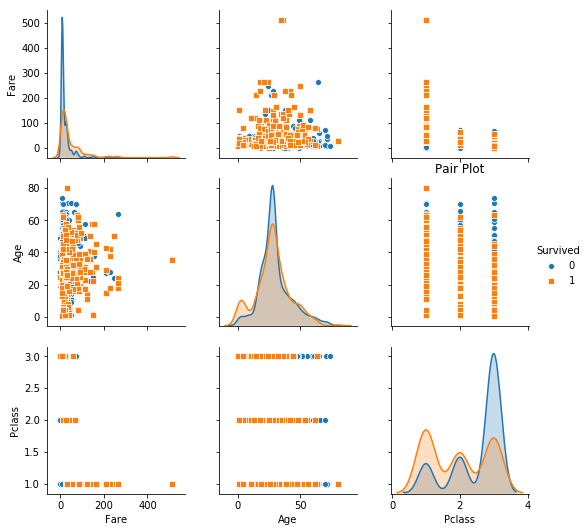

In [11]:
sns.pairplot(titanic_data[["Fare","Age","Pclass","Survived"]],vars = ["Fare","Age","Pclass"],hue="Survived", dropna=True,markers=["o", "s"])
plt.title('Pair Plot')

Text(0.5,1,'Correlation between features')

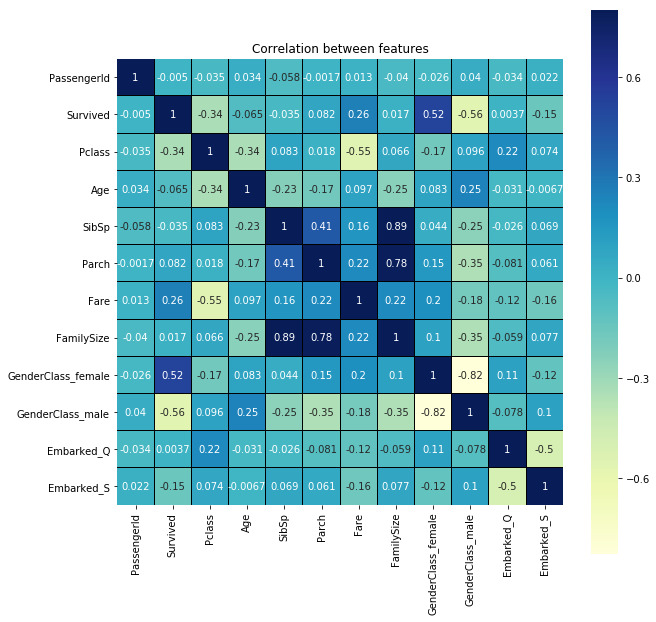

In [12]:
corr = titanic_data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,vmax=.8,linewidth=.01, square = True, annot = True,cmap='YlGnBu',linecolor ='black')
plt.title('Correlation between features')

In [13]:
X = titanic.loc[:,titanic.columns != 'Survived']
X.head()


,PassengerId,Pclass,Age,Fare,FamilySize,GenderClass_female,GenderClass_male,Embarked_Q,Embarked_S
0,1,3,22.0,7.2500,2,0,1,0,1
1,2,1,38.0,71.2833,2,1,0,0,0
2,3,3,26.0,7.9250,1,1,0,0,1
3,4,1,35.0,53.1000,2,1,0,0,1
4,5,3,35.0,8.0500,1,0,1,0,1


In [15]:
y = titanic.Survived 
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [16]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

C:\Users\t.shah\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [17]:
print(X_train.shape)
print(y_train.shape)

(712, 9)
(712,)


The code block given below shows how these steps are carried out:<br/>

``` from sklearn.ensemble import RandomForestClassifier
    model = RandomForestClassifier()
    model.fit(X, y)
    predicted= model.predict(x_test)
    ```

### Model without parameter specification

In [18]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state = 0)
model.fit(X_train, y_train)

C:\Users\t.shah\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

### Model with parameters specified

In [19]:
model1 = RandomForestClassifier(random_state = 0,
                                n_estimators = 15,
                                min_samples_split = 2,
                                min_samples_leaf = 1)

model1.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=15, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

### Hyperparameters of Sklearn Random forest classifier :
**bootstrap **: boolean, optional (default=True)

    Whether bootstrap samples are used when building trees.
**min_samples_leaf :** int, float, optional (default=1)

    The minimum number of samples required to be at a leaf node:

        If int, then consider min_samples_leaf as the minimum number.
        If float, then min_samples_leaf is a percentage and ceil(min_samples_leaf * n_samples) are the minimum number of samples for each node.
**n_estimators :** integer, optional (default=10)

        The number of trees in the forest.
**min_samples_split **: int, float, optional (default=2)

    The minimum number of samples required to split an internal node:

        If int, then consider min_samples_split as the minimum number.
        If float, then min_samples_split is a percentage and ceil(min_samples_split * n_samples) are the minimum number of samples for each split.
**max_features :** int, float, string or None, optional (default=”auto”)

    The number of features to consider when looking for the best split:

        If int, then consider max_features features at each split. -If float, then max_features is a percentage and int(max_features * n_features) features are considered at each split.
        If “auto”, then max_features=sqrt(n_features).
        If “sqrt”, then max_features=sqrt(n_features) (same as “auto”).
        If “log2”, then max_features=log2(n_features).
        If None, then max_features=n_features.
**max_depth :** integer or None, optional (default=None)

The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
**max_leaf_nodes :** int or None, optional (default=None)

Grow trees with max_leaf_nodes in best-first fashion. Best nodes are defined as relative reduction in impurity. If None then unlimited number of leaf nodes.

In [20]:
y_pred_train = model.predict(X_train)
y_pred_train1 = model1.predict(X_train)

In [21]:
y_pred_test = model.predict(X_test)                                                           # make predictions on the testing set
y_pred_test1 = model1.predict(X_test)

### Model evaluation

In [25]:
from sklearn.metrics import accuracy_score
print('Accuracy score for test data using the model without parameter specification:', accuracy_score(y_test,y_pred_test))
print('Accuracy score for test data using the model with parameter specification:', accuracy_score(y_test,y_pred_test1))
'''You can see that the accuracy has improved when we have altered the default parameters.'''

Accuracy score for test data using the model without parameter specification: 0.776536312849162
Accuracy score for test data using the model with parameter specification: 0.7932960893854749


'You can see that the accuracy has improved when we have altered the default parameters.'

In [26]:
from sklearn.metrics import confusion_matrix

confusion_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred_test))

confusion_matrix.index = ['Actual Died','Actual Survived']
confusion_matrix.columns = ['Predicted Died','Predicted Survived']
print(confusion_matrix)

                 Predicted Died  Predicted Survived
Actual Died                  94                  12
Actual Survived              28                  45


This means 94 + 45 = __139 correct predictions__ & 28 + 12 = __40 false predictions__.

Confusion matrix for the prediction by the random forest classifier when the parameters are specified.

In [27]:
from sklearn.metrics import confusion_matrix

confusion_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred_test1))

confusion_matrix.index = ['Actual Died','Actual Survived']
confusion_matrix.columns = ['Predicted Died','Predicted Survived']
print(confusion_matrix)

                 Predicted Died  Predicted Survived
Actual Died                  96                  10
Actual Survived              27                  46


This means 96 + 46 = __142 correct predictions__ & 27 + 10 = __37 false predictions__.
 Observe that the number of correct prediction have __increased__ compared to our model where the default parameters are used.<br/>
 Now, we will see a way to automatically find the best parameters. 

##  Random forest with RandomizedsearchCV
<br/>
Applying __RandomizedsearchCV__ method for __exhaustive search over specified parameter values__ of estimator.<br/>
To know more about the different parameters in random forest classifier, refer the [documentation](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html). <br/>
Below we will apply gridsearch over the following parameters:
- criterion 
- max_depth 
- n_estimators
- min_samples_split
- min_samples_leaf

You can change other parameters also and compare the impact of it via calculating __accuracy score & confusion matrix__

In [30]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
# parameters for GridSearchCV
# specify parameters and distributions to sample from
param_dist = {"max_depth": range(2,5),
              "min_samples_split": sp_randint(2, 11),
              "min_samples_leaf": sp_randint(1, 11),
              "bootstrap": [True, False],
              "n_estimators": [100, 400, 700, 1000, 1500],
              "criterion" : ["gini", "entropy"],
              'max_features': ['sqrt', 'log2', None]
             }
# run randomized search
n_iter_search = 50
random_search = RandomizedSearchCV(model, param_distributions = param_dist,
                                   n_iter = n_iter_search,
                                   n_jobs = -1)

In [31]:
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=None, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=50, n_jobs=-1,
          param_distributions={'max_depth': range(2, 5), 'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001F8609EC4E0>, 'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001F8609EC8D0>, 'bootstrap': [True, False], 'n_estimators': [100, 400, 700, 1000, 1500], 'criterion': ['gini', 'entropy'], 'max_features': ['sqrt', 'log2', None]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
 

In [32]:
y_pred_test1 = random_search.predict(X_test)

In [33]:
from sklearn.metrics import accuracy_score
print('Accuracy score on test data with RandomizedSearchCV is:', accuracy_score(y_test,y_pred_test1))

Accuracy score on test data with RandomizedSearchCV is: 0.8100558659217877


In [34]:
from sklearn.metrics import confusion_matrix

confusion_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred_test1))

confusion_matrix.index = ['Actual Died','Actual Survived']
confusion_matrix.columns = ['Predicted Died','Predicted Survived']
print(confusion_matrix)

                 Predicted Died  Predicted Survived
Actual Died                  97                   9
Actual Survived              25                  48


You can see 97 + 47 = __144 correct predictions__ & 26 + 9 = __35 false predictions__.

__Observations:__

- With __RandomizedSearchCV__ *accuracy_score* __increased__ to __0.804__ and the __number of correct predictions increased to 144__ and number of false predictions __decreased__ to __35__. 